# Mass spectrometry plotting
---
---


## Requirements
---

- numpy

- matplotlib

- pyopenms

- pymzml



<br>

# Defining important python functions to the notebook functionalityes
---
---

In [ ]:
def file_path():
    """
    Definir o path de um arquivo interativamente, pelo tkinter
    
    Input
    ----------
    askopenfilename() : tkinter
        Seleção de um arquivo, interativamente pelo GUI do tkinter
    
    Returns
    -------
    arquivo : string
        Path completo de um arquivo
    
    Exemplo
    -------
    >>>file = file_path()
    file: "/home/eduardo/Documentos/Resultados/AuNp.txt"
    
    """

    Tk().withdraw()
    arquivo = askopenfilename()
    return arquivo


def file_name(path):
    """
    Extrair o nome de um arquivo, dando o path dele como argumento.
    
    Parameters
    ----------
    path : string
        Path completo do arquivo que se deseja o nome.
    
    Returns
    -------
    name : string
        O nome do arquivo cujo path completo foi fornecido.
    
    Example
    -------
    >>> file_name("/home/home/eduardo/Documentos/teste.py")
    teste.py
    
    """
    name_list1 = path.split('/')
    name1 = name_list1[-1]
    name_list2 = name1.split('.')
    name2 = name_list2[0]
    name_list3 = name2.split("_")
    name = " ".join(name_list3)
    return name

## Matplotlib design parameter
---

- Available sizes: xx-small, x-small, small, medium, large, x-large, xx-large, smaller, larger.

- Available weigths: ultralight, light, normal, regular, book, medium, roman, semibold, demibold, demi, bold, heavy, extra bold, black.

- Available familys: serif, sans-serif, sans serif, cursive, fantasy, monospace, sans.

- The bellow code cell print all avaliable font names found bytt matplotlib

In [5]:
import matplotlib.pyplot as plt
from cycler import cycler

plt.rcParams["pdf.use14corefonts"] = True
# trigger core fonts for PS backend
plt.rcParams["ps.useafm"] = True
#plt.rcParams['backend'] = 'Agg'
plt.rcParams.update(
    {
        "figure.dpi": 100,
        "font.size": 18,
        "figure.facecolor": "white",
        "figure.figsize": [10, 6],
        "figure.frameon": True,
        "figure.titlesize": "large",
        "figure.titleweight": "bold",
        "figure.labelsize": "medium",
        "figure.labelweight": "normal",
        "figure.edgecolor": "#000000",
    }
)

plt.rcParams.update(
    {
        "font.style": "normal",
        "font.weight": "bold",
        "font.family": "QTHelvet-Black",
        "font.sans-serif": "QTHelvet-Black",
        "font.size": 18,
    }
)

plt.rcParams.update(
    {
        "axes.grid": True,
        "axes.grid.axis": "both",
        "axes.grid.which": "major",
        "axes.labelcolor": "#172038",
        "axes.edgecolor": "#bcbcbc",
        "axes.facecolor": "#eeeeee",
        "axes.linewidth": 1.0,
    }
)

plt.rcParams.update(
    {
        "grid.alpha": 1.0,
        "grid.color": "#b2b2b2",
        "grid.linestyle": "--",
        "grid.linewidth": 0.5,
        "grid.alpha": 1.0,
    }
)

plt.rcParams.update(
    {
        "savefig.directory": "/Programação/jupyter/IqDu/Attachments",
        "savefig.format": "png",
        "savefig.transparent": True,
    }
)

plt.rcParams.update(
    {
        "xtick.color": "#bcbcbc",
        "xtick.labelsize": "medium",
        "xtick.major.pad": 3.5,
        "xtick.major.size": 3.5,
        "xtick.alignment": "center",
        "xtick.color": "#000000",
        "ytick.labelsize": "x-small",
        "ytick.major.pad": 3.5,
        "ytick.major.size": 3.5,
        "ytick.alignment": "center_baseline",
        "ytick.color": "#000000",
    }
)
plt.rcParams.update(
    {
        "axes.prop_cycle": cycler(
            "color",
            [
                "#7499ff",
                "#348ABD",
                "#988ED5",
                "#777777",
                "#FBC15E",
                "#8EBA42",
                "#FFB5B8",
            ],
        )
    }
)

<br>

# Plotly plotting
---
---



- A .mzML is loadaded containing the spectra values

- A output .html file is generated by plotly

- The plot is formatted as a line spectra

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os

import pymzml


def main():
    """
    This function shows how to plot a simple spectrum. It can be directly
    plotted via this script or using the python console.

    usage:

        ./plot_spectrum.py

    """

    example_file = (
        "/home/eduardotc/Programação/my_gits/materials_chempy/example_data/anad2.mzML"
    )
    run = pymzml.run.Reader(example_file)
    p = pymzml.plot.Factory()
    for spec in run:
        p.new_plot()
        p.add(spec.peaks("centroided"), color=(0, 0, 0), style="sticks", name="peaks")
        filename = "example_plot_{0}_{1}.html".format(
            os.path.basename(example_file), spec.ID
        )
        p.save(
            filename=filename,
            layout={
                "xaxis": {
                    "ticks": "outside",
                    "ticklen": 2,
                    "tickwidth": 0.25,
                    "showgrid": False,
                    "linecolor": "black",
                },
                "yaxis": {
                    "ticks": "outside",
                    "ticklen": 2,
                    "tickwidth": 0.25,
                    "showgrid": False,
                    "linecolor": "black",
                },
                "plot_bgcolor": "rgba(255, 255, 255, 0)",
                "paper_bgcolor": "rgba(255, 255, 255, 0)",
            },
        )
        print("Plotted file: {0}".format(filename))
        break


if __name__ == "__main__":
    main()

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import os

import pymzml


def main():
    """
    Plot a plotly html, given a .mzML mass spec file.

    Parameters
    ----------
    mzmlfile : string

    Returns
    -------
    None.

    """
    import os
    import pymzml
    
    mzmlfile='example_data/anad2.mzML'
    run = pymzml.run.Reader(mzmlfile)
    p = pymzml.plot.Factory()
    for spec in run:
        p.new_plot()
        p.add(spec.peaks("centroided"), color=(0, 0, 0), style="sticks", name="peaks")
        file_name = os.path.basename(mzmlfile)
        base_name = os.path.splitext(file_name)[0]
        html_path = base_name + ".html"
        p.save(
            filename=html_path,
            layout={
                "xaxis": {
                    "ticks": "outside",
                    "ticklen": 2,
                    "tickwidth": 0.25,
                    "showgrid": False,
                    "linecolor": "black",
                },
                "yaxis": {
                    "ticks": "outside",
                    "ticklen": 2,
                    "tickwidth": 0.25,
                    "showgrid": False,
                    "linecolor": "black",
                },
                "plot_bgcolor": "rgba(255, 255, 255, 0)",
                "paper_bgcolor": "rgba(255, 255, 255, 0)",
            },
        )
        print(f"Plotted file: {html_path}")
if __name__ == "__main__":
    main()

In [ ]:
import os
file_name = 'example_data/anad2.mzML'
base_name = os.path.basename(file_name)
print(base_name)

In [3]:
import pymzml
import os

mzmlfile='../example_data/anad2.mzML'
run = pymzml.run.Reader('/home/eduardotc/Programação/my_gits/materials_chempy/example_data/anad2.mzML')
p = pymzml.plot.Factory()
for spec in run:
    p.new_plot()
    p.add(spec.peaks("centroided"), color=(0, 0, 0), style="sticks", name="peaks")
    filename = "example_plot_{0}_{1}.html".format(
        os.path.basename(mzmlfile), spec.ID
    )
    p.save(
        filename=filename,
        layout={
            "xaxis": {
                "ticks": "outside",
                "ticklen": 2,
                "tickwidth": 0.25,
                "showgrid": False,
                "linecolor": "black",
            },
            "yaxis": {
                "ticks": "outside",
                "ticklen": 2,
                "tickwidth": 0.25,
                "showgrid": False,
                "linecolor": "black",
            },
            "plot_bgcolor": "rgba(255, 255, 255, 0)",
            "paper_bgcolor": "rgba(255, 255, 255, 0)",
        },
    )
    print("Plotted file: {0}".format(filename))

[Warning] Not index found and build_index_from_scratch is False
1 1
Plotted file: example_plot_anad2.mzML_1.html
1 1
1 2
Plotted file: example_plot_anad2.mzML_2.html
1 1
1 2
2 1
Plotted file: example_plot_anad2.mzML_3.html
1 1
1 2
2 1
2 2
Plotted file: example_plot_anad2.mzML_4.html
1 1
1 2
2 1
2 2
3 1
Plotted file: example_plot_anad2.mzML_5.html
1 1
1 2
2 1
2 2
3 1
3 2
Plotted file: example_plot_anad2.mzML_6.html
1 1
1 2
2 1
2 2
3 1
3 2
4 1
Plotted file: example_plot_anad2.mzML_7.html
1 1
1 2
2 1
2 2
3 1
3 2
4 1
4 2
Plotted file: example_plot_anad2.mzML_8.html
1 1
1 2
2 1
2 2
3 1
3 2
4 1
4 2
5 1
Plotted file: example_plot_anad2.mzML_9.html
1 1
1 2
2 1
2 2
3 1
3 2
4 1
4 2
5 1
5 2
Plotted file: example_plot_anad2.mzML_10.html
1 1
1 2
2 1
2 2
3 1
3 2
4 1
4 2
5 1
5 2
6 1
Plotted file: example_plot_anad2.mzML_11.html
1 1
1 2
2 1
2 2
3 1
3 2
4 1
4 2
5 1
5 2
6 1
6 2
Plotted file: example_plot_anad2.mzML_12.html
1 1
1 2
2 1
2 2
3 1
3 2
4 1
4 2
5 1
5 2
6 1
6 2
7 1
Plotted file: example_plot_an

# Matplotlib plotting
---
---

[eduardotcampos@usp.br] [2023]

[07/14]

---
---

## Requirements
---

- sklearn

- pyopenms

- numpy

- matplotlib

## Defined values
---

- file path: Complete path to the mzml mass spec file

- ylimit: Y intensity axis limits

- n_highest: number of highets intensity peaks tha is desired to be labeled

In [ ]:
file_path = '../example_data/anad2.mzML'
fname = file_name(file_path)
ylimit = [0, 5e+6]
n_highest = 15

In [ ]:
import matplotlib.pyplot as plt
    import numpy as np
    import pyopenms

    # Define the file path

    # Load the spectra from the mzML file
    exp = pyopenms.MSExperiment()
    pyopenms.MzMLFile().load(file_path, exp)

    # Extract the mass-to-charge ratios (m/z) and intensity values
    mz_values = []
    intensity_values = []
    for spectrum in exp:
        mz_array = spectrum.get_peaks()[0]
        intensity_array = spectrum.get_peaks()[1]
        mz_values.extend(mz_array)
        intensity_values.extend(intensity_array)

    # Calculate the baseline (simple mean in this example)
    baseline = np.mean(intensity_values)

    # Subtract the baseline from the intensity values
    intensity_values = np.array(intensity_values) - baseline


    # Get the indices of the n highest intensity peaks

    total_indices = []
    total_indices.append(0)
    ncycle = 1
    diffms = True
    # Label the n highest intensity peaks with their corresponding m/z values
    (
        fig,
        ax,
    ) = plt.subplots(figsize=(10, 6), dpi=200)
    # Plot the mass spectrum after subtracting the baseline
    ax.set_ylim(ylimit)
    ax.set_xlabel("m/z")
    ax.set_ylabel("Intensity")
    # Determine the number of highest intensity peaks to label (user-defined)
    ax.set_title("Mass Spectrum ")
    while len(total_indices) <= n_highest:
        mz = round((mz_values[np.argsort(intensity_values)[-ncycle]]), 2)
        for i in total_indices:
            if abs(mz - i) < 0.5:
                diffms = False
        if diffms:
            intensity = intensity_values[np.argsort(intensity_values)[-ncycle]]
            ax.annotate(mz, xy=(mz, intensity), fontsize="x-small")
            total_indices.append(mz)
        ncycle = ncycle + 1
        diffms = True
    # plt.stem(mz_values, intensity_values, markerfmt="none")
    ax.plot(mz_values, intensity_values, linewidth=0.5)

<br>

## Continuum Spectra
---

- Uncomment ax.plot and comment plt.stem in the end of the cell to change the plot to spectra type
  instead of lines

- Defined important variables are in the first cell

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pyopenms

# Define the file path

# Load the spectra from the mzML file
exp = pyopenms.MSExperiment()
pyopenms.MzMLFile().load(file_path, exp)

# Extract the mass-to-charge ratios (m/z) and intensity values
mz_values = []
intensity_values = []
for spectrum in exp:
    mz_array = spectrum.get_peaks()[0]
    intensity_array = spectrum.get_peaks()[1]
    mz_values.extend(mz_array)
    intensity_values.extend(intensity_array)

# Calculate the baseline (simple mean in this example)
baseline = np.mean(intensity_values)

# Subtract the baseline from the intensity values
intensity_values = np.array(intensity_values) - baseline


# Get the indices of the n highest intensity peaks

total_indices = []
total_indices.append(0)
ncycle = 1
diffms = True
# Label the n highest intensity peaks with their corresponding m/z values
(
    fig,
    ax,
) = plt.subplots(figsize=(10, 6), dpi=200)
# Plot the mass spectrum after subtracting the baseline
ax.set_ylim(ylimit)
ax.set_xlabel("m/z")
ax.set_ylabel("Intensity")
# Determine the number of highest intensity peaks to label (user-defined)
ax.set_title("Mass Spectrum ")
while len(total_indices) <= n_highest:
    mz = round((mz_values[np.argsort(intensity_values)[-ncycle]]), 2)
    for i in total_indices:
        if abs(mz - i) < 0.5:
            diffms = False
    if diffms:
        intensity = intensity_values[np.argsort(intensity_values)[-ncycle]]
        ax.annotate(mz, xy=(mz, intensity), fontsize="x-small")
        total_indices.append(mz)
    ncycle = ncycle + 1
    diffms = True
# plt.stem(mz_values, intensity_values, markerfmt="none")
ax.plot(mz_values, intensity_values, linewidth=0.5)

<br>

# Testes

---

NameError: name 'n_highest' is not defined

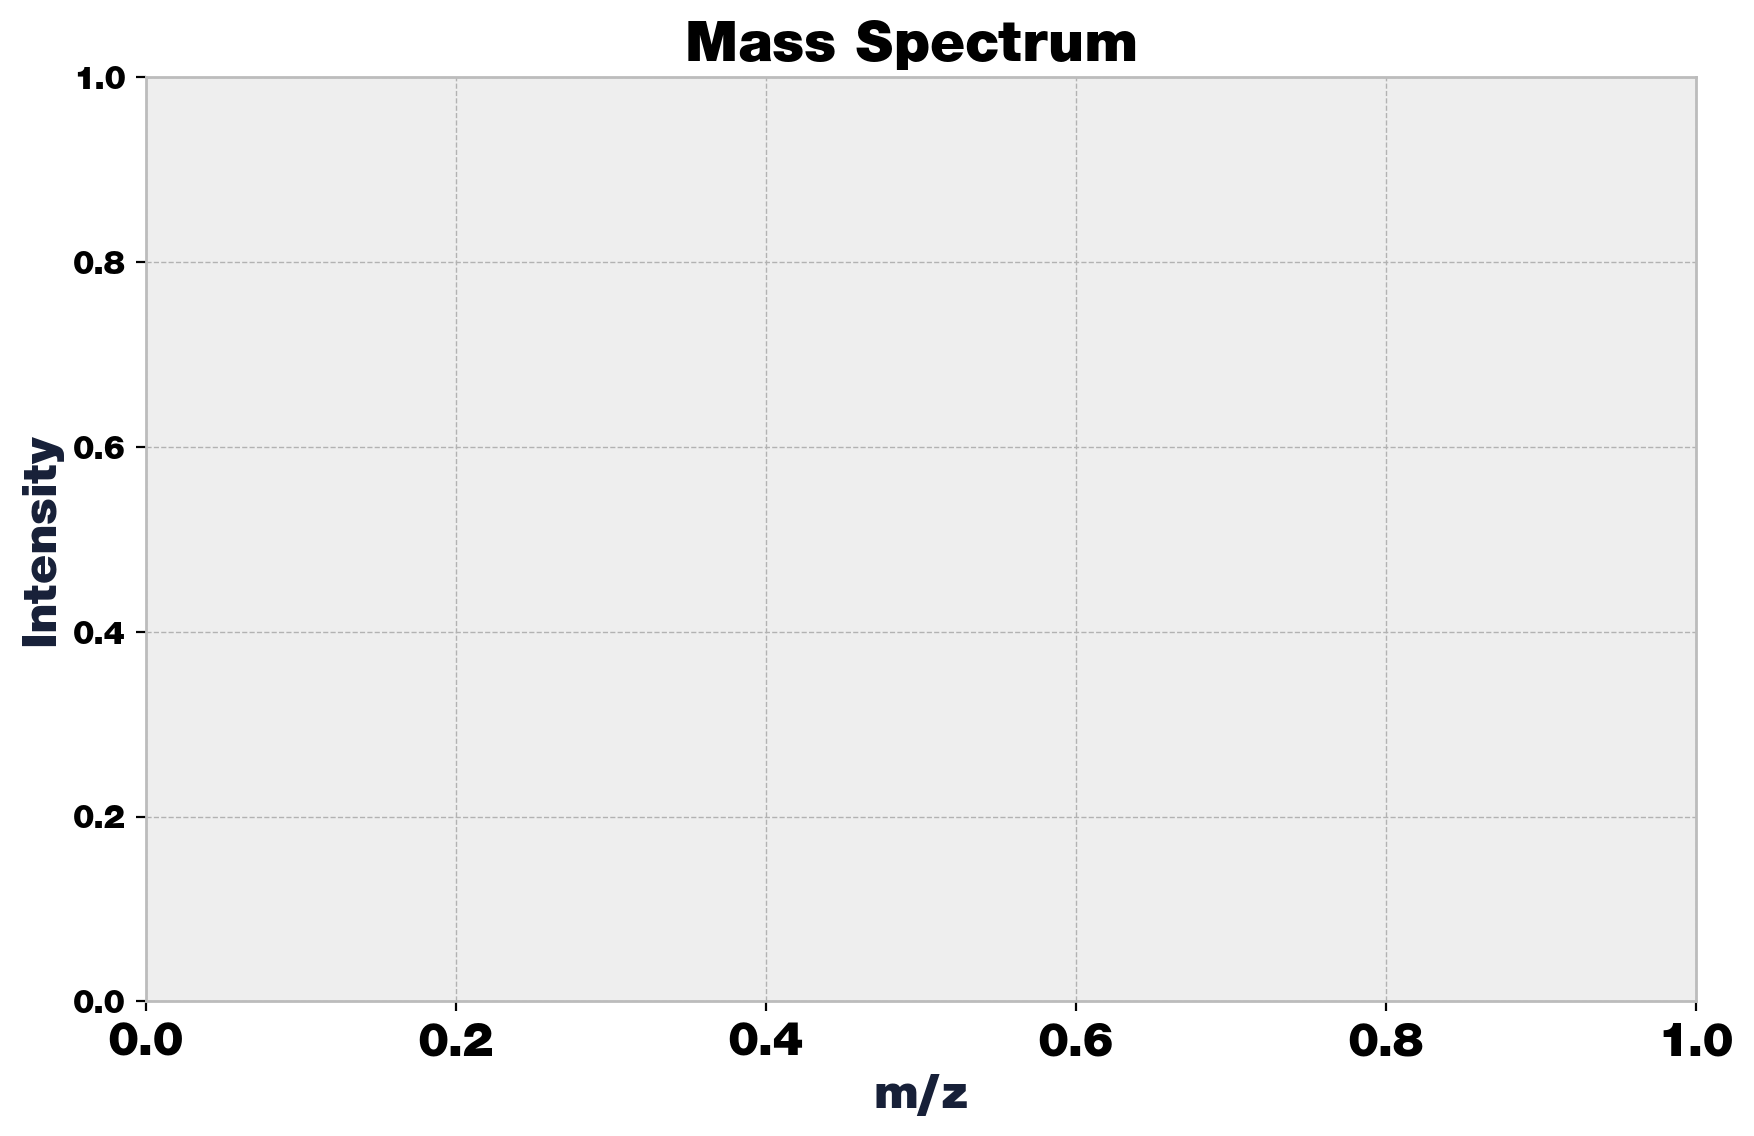

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pyopenms

# Define the file path
mzmlfile = '/home/eduardotc/Programação/my_gits/materials_chempy/example_data/anad2.mzML'
# Load the spectra from the mzML file
exp = pyopenms.MSExperiment()
pyopenms.MzMLFile().load(mzmlfile, exp)

# Extract the mass-to-charge ratios (m/z) and intensity values
mz_values = []
intensity_values = []
for spectrum in exp:
    mz_array = spectrum.get_peaks()[0]
    intensity_array = spectrum.get_peaks()[1]
    mz_values.extend(mz_array)
    intensity_values.extend(intensity_array)

# Calculate the baseline (simple mean in this example)
baseline = np.mean(intensity_values)

# Subtract the baseline from the intensity values
intensity_values = np.array(intensity_values) - baseline


# Get the indices of the n highest intensity peaks

total_indices = []
total_indices.append(0)
ncycle = 1
diffms = True
# Label the n highest intensity peaks with their corresponding m/z values
(
    fig,
    ax,
) = plt.subplots(figsize=(10, 6), dpi=200)
# Plot the mass spectrum after subtracting the baseline
# ax.set_ylim(ylimit)
ax.set_xlabel("m/z")
ax.set_ylabel("Intensity")
# Determine the number of highest intensity peaks to label (user-defined)
ax.set_title("Mass Spectrum ")
while len(total_indices) <= n_highest:
    mz = round((mz_values[np.argsort(intensity_values)[-ncycle]]), 2)
    for i in total_indices:
        if abs(mz - i) < 0.5:
            diffms = False
    if diffms:
        intensity = intensity_values[np.argsort(intensity_values)[-ncycle]]
        ax.annotate(mz, xy=(mz, intensity), fontsize="x-small")
        total_indices.append(mz)
    ncycle = ncycle + 1
    diffms = True
# plt.stem(mz_values, intensity_values, markerfmt="none")
ax.plot(mz_values, intensity_values, linewidth=0.5)

<br>

## Single lines matplotlib
---

- Filtering by number of highest mass desired to use to plot (n_highest variable)

- if abs(mz - i) < 0.5: defines the windows of mass to exclude in sequent choosen masses

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pyopenms

# Define the file path
file_path = (
    "../example_data/anad2.mzML"
)
ylimit = [0, 500000000]
# Load the spectra from the mzML file
exp = pyopenms.MSExperiment()
pyopenms.MzMLFile().load(file_path, exp)

# Extract the mass-to-charge ratios (m/z) and intensity values
mz_values = []
intensity_values = []
for spectrum in exp:
    mz_array = spectrum.get_peaks()[0]
    intensity_array = spectrum.get_peaks()[1]
    mz_values.extend(mz_array)
    intensity_values.extend(intensity_array)

# Calculate the baseline (simple mean in this example)
baseline = np.mean(intensity_values)

# Subtract the baseline from the intensity values
intensity_values = np.array(intensity_values) - baseline


# Get the indices of the n highest intensity peaks

total_indices = []
total_indices.append(0)
ncycle = 1
diffms = True
# Label the n highest intensity peaks with their corresponding m/z values
(
    fig,
    ax,
) = plt.subplots(figsize=(10, 6), dpi=200)
# Plot the mass spectrum after subtracting the baseline
ax.set_ylim(ylimit)
ax.set_xlabel("m/z")
ax.set_ylabel("Intensity")
# Determine the number of highest intensity peaks to label (user-defined)
ax.set_title("Mass Spectrum ")
high_ind = np.array([])
high_mz = np.array([])
high_int = np.array([])
n_highest = 12
while len(total_indices) <= n_highest:
    intaddind = np.argpartition(intensity_values, -ncycle)[-ncycle]
    mz = mz_values[intaddind]
    for i in total_indices:
        if abs(mz - i) < 0.5:
            diffms = False
    if diffms:
        # intaddind = np.argpartition(intensity_values, -ncycle)[-1]
        high_int = np.append(high_int, intensity_values[intaddind])
        high_mz = np.append(high_mz, mz_values[intaddind])
        ax.annotate(
            round(mz, 2), xy=(mz, intensity_values[intaddind]), fontsize="x-small"
        )
        total_indices.append(mz)
    ncycle = ncycle + 1
    diffms = True

print(high_int)
print(high_mz)
plt.stem(high_mz, high_int, markerfmt="none")
plt.savefig("anad2ms.png", dpi=250, format="png", transparent=True)

<br>

# Main Matplotlib plotting
---
---

- Baseline by main signal of low intensity signals

## Variables
---

```file_path``` defines the mzML file input path

```ylimit``` the intensity y axis limit

```n_highest``` the number of most intense single line peaks to be plotted

```n_labels``` the number of the most intense peaks to be automatic labeled with m/z

```resolution_thrs``` the m/z difference needed to 2 adjacent different peaks to be differentiated, and plotted


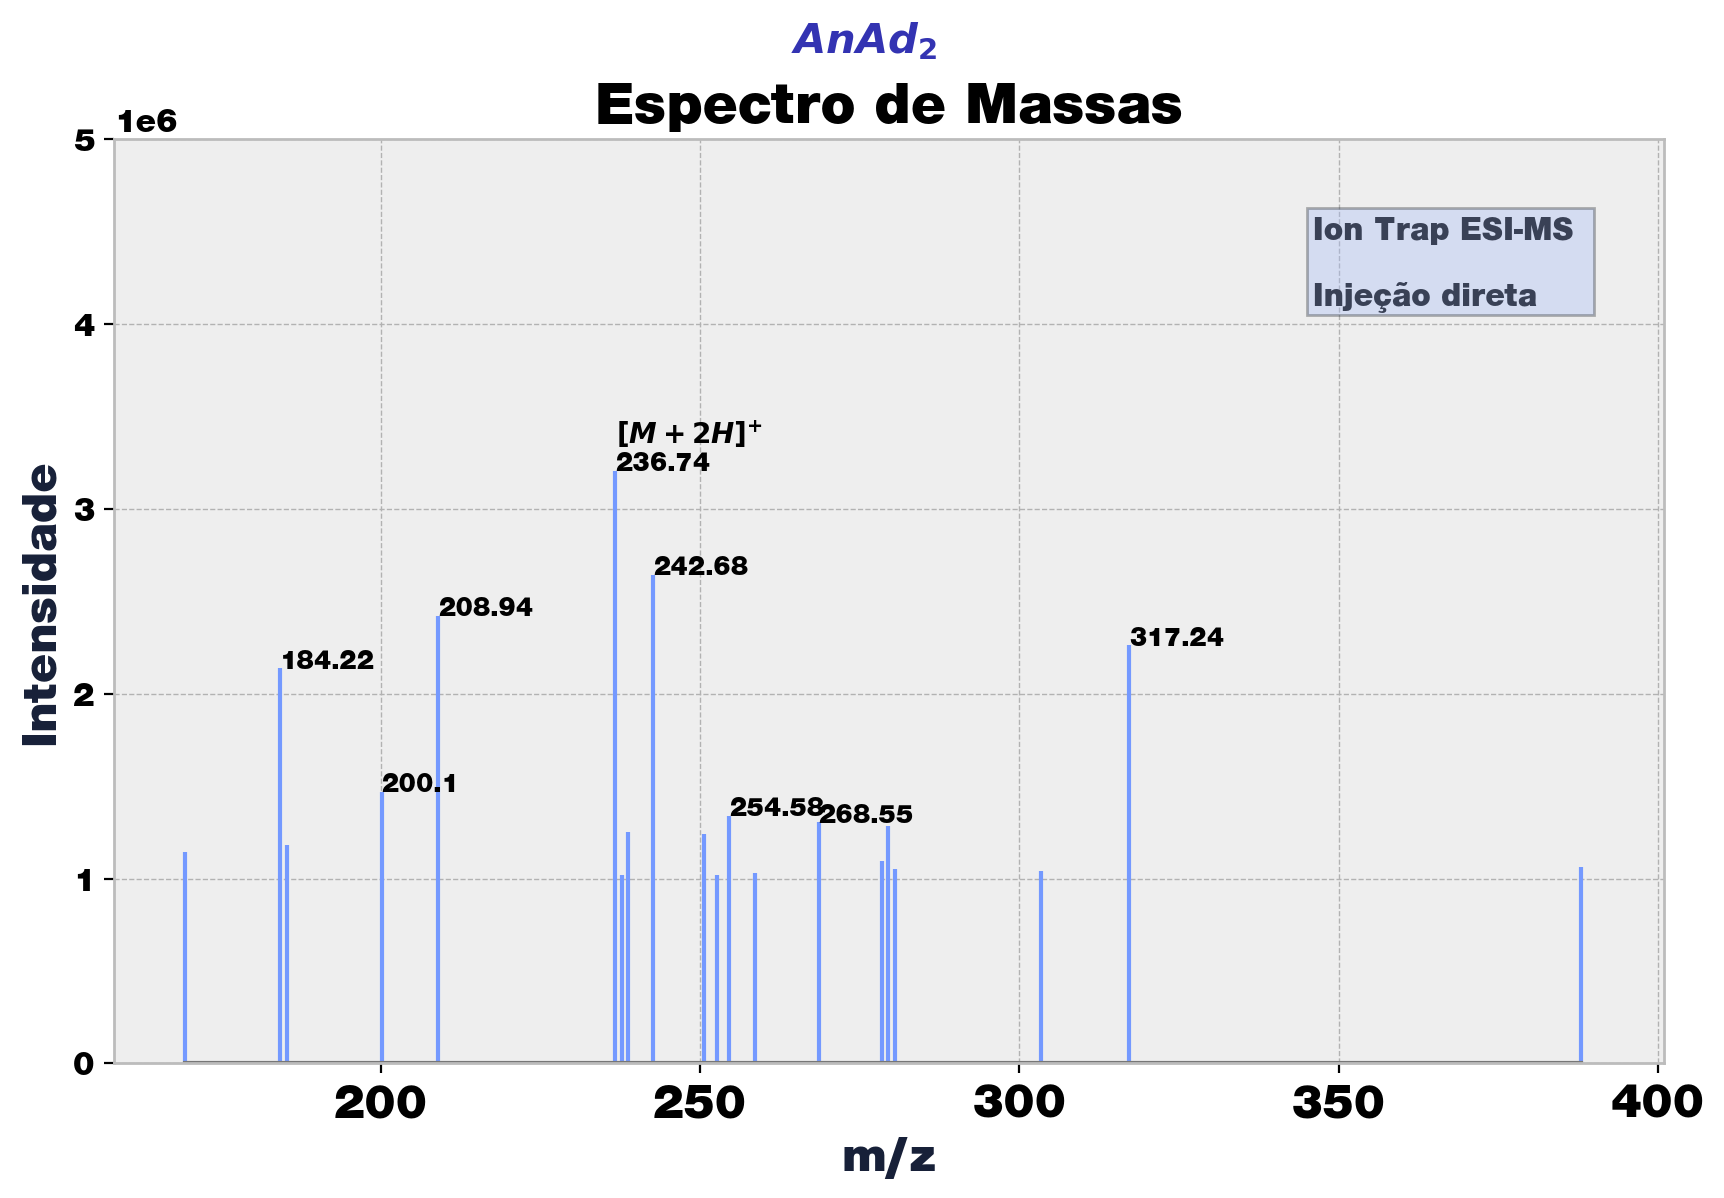

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyopenms

# Customizable variables
file_path = (
    "/home/eduardotc/Programação/my_gits/materials_chempy/example_data/anad2.mzML"
)
fname='teste'
ylimit = [0, 5e+6]
n_highest = 20
n_labels = 8
resolution_thrs=0.3
# Load the spectra from the mzML file
exp = pyopenms.MSExperiment()
pyopenms.MzMLFile().load(file_path, exp)

# Extract the mass-to-charge ratios (m/z) and intensity values
mz_values = []
intensity_values = []
for spectrum in exp:
    mz_array = spectrum.get_peaks()[0]
    intensity_array = spectrum.get_peaks()[1]
    mz_values.extend(mz_array)
    intensity_values.extend(intensity_array)

# Calculate the baseline (simple mean in this example)
baseline = np.mean(intensity_values)

# Subtract the baseline from the intensity values
intensity_values = np.array(intensity_values) - baseline


# Initiate conditional variable counters
total_indices = []
total_indices.append(0)
ncycle = 1
diffms = True
npeaks=0

# Define the size and dpi of the image
(
    fig,
    ax,
) = plt.subplots(figsize=(10, 6), dpi=200)

# Defining the plot design
ax.set_ylim(ylimit)
ax.set_xlabel("m/z")
ax.set_ylabel("Intensidade")
fig.suptitle("$AnAd_2$", fontsize=15, color='#3333b2')

# Determine the number of highest intensity peaks to label (user-defined)
ax.set_title("Espectro de Massas")
high_ind = np.array([])
high_mz = np.array([])
high_int = np.array([])

# Conditional loop to plot the defined number of peaks
while len(total_indices) <= n_highest:
    intaddind = np.argpartition(intensity_values, -ncycle)[-ncycle]
    mz = mz_values[intaddind]
    for i in total_indices:
        if abs(mz - i) < resolution_thrs:
            diffms = False
    if diffms:
        high_int = np.append(high_int, intensity_values[intaddind])
        high_mz = np.append(high_mz, mz_values[intaddind])
        
        # Conditional to automatic label the desired number of peaks
        if npeaks < n_labels:
            ax.annotate(
                round(mz, 2), xy=(mz, intensity_values[intaddind]), fontsize=10
            )
            npeaks=npeaks+1
        total_indices.append(mz)
    ncycle = ncycle + 1
    diffms = True

# Manual peak annotation
ax.annotate(
    (
        '$[M + 2H]^{+}$'
        '\n'
    ),
    xy=(236.74, 3.20e+6),
    fontsize=10,
    fontweight='bold',
)

# Defining a legend colored box
axin2=ax.indicate_inset([345, 4.05e+6, 45, 5.8e+5], facecolor='#a6bcf8', edgecolor='#252a2d', alpha=0.35)

# Defining the writtent content of the legend box
ax.annotate(
    (
        'Ion Trap ESI-MS'
        '\n'
        '\n'
        'Injeção direta'
    ),
    xy=(346, 4.1e+6),
    fontsize=12,
    fontfamily='QTHelvet-black',
    fontweight='normal',
    color='#000000',
)

# Plotting the spectrum as line peaks
ax.stem(high_mz, high_int, markerfmt="none")
ax.plot
plt.show

# Saving the image
plt.savefig(fname)

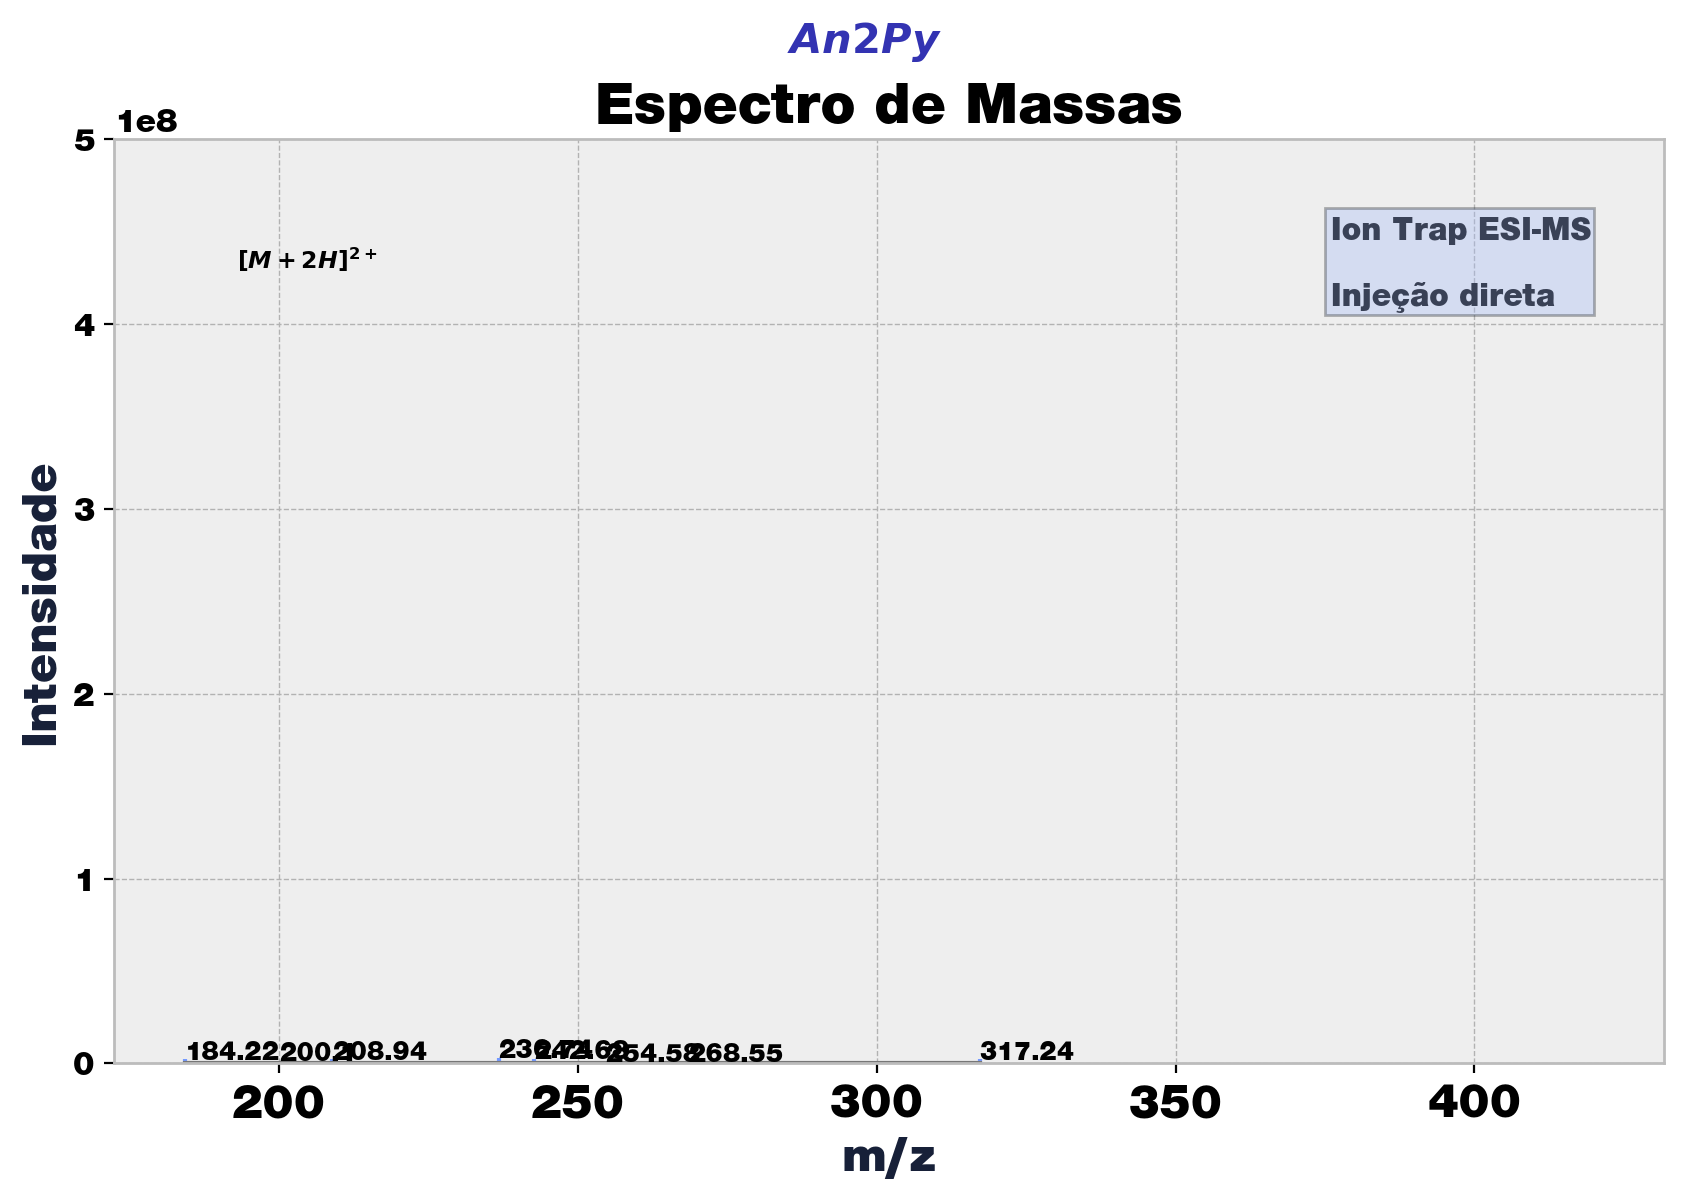

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyopenms
# Define the file path
file_path = (
    "/home/eduardotc/Programação/my_gits/materials_chempy/example_data/anad2.mzML"
)
ylimit = [0, 5e+8]
# Load the spectra from the mzML file
exp = pyopenms.MSExperiment()
pyopenms.MzMLFile().load(file_path, exp)

# Extract the mass-to-charge ratios (m/z) and intensity values
mz_values = []
intensity_values = []
for spectrum in exp:
    mz_array = spectrum.get_peaks()[0]
    intensity_array = spectrum.get_peaks()[1]
    mz_values.extend(mz_array)
    intensity_values.extend(intensity_array)

# Calculate the baseline (simple mean in this example)
baseline = np.mean(intensity_values)

# Subtract the baseline from the intensity values
intensity_values = np.array(intensity_values) - baseline


# Get the indices of the n highest intensity peaks

total_indices = []
total_indices.append(0)
ncycle = 1
diffms = True
npeaks=0
# Label the n highest intensity peaks with their corresponding m/z values
(
    fig,
    ax,
) = plt.subplots(figsize=(10, 6), dpi=200)
# Plot the mass spectrum after subtracting the baseline
ax.set_ylim(ylimit)
ax.set_xlabel("m/z")
ax.set_ylabel("Intensidade")
fig.suptitle("$An2Py$", fontsize=15, color='#3333b2')
# Determine the number of highest intensity peaks to label (user-defined)
ax.set_title("Espectro de Massas")
high_ind = np.array([])
high_mz = np.array([])
high_int = np.array([])
n_highest = 8
ylimit = [0, 500000000]
# Plot the mass spectrum after subtracting the baseline
# Determine the number of highest intensity peaks to label (user-defined)

while len(total_indices) <= n_highest:
    intaddind = np.argpartition(intensity_values, -ncycle)[-ncycle]
    mz = mz_values[intaddind]
    for i in total_indices:
        if abs(mz - i) < 0.5:
            diffms = False
    if diffms:
        # intaddind = np.argpartition(intensity_values, -ncycle)[-1]
        high_int = np.append(high_int, intensity_values[intaddind])
        high_mz = np.append(high_mz, mz_values[intaddind])
        if npeaks < 8:
            ax.annotate(
                round(mz, 2), xy=(mz, intensity_values[intaddind]), fontsize=10
            )
            npeaks=npeaks+1
        total_indices.append(mz)
    ncycle = ncycle + 1
    diffms = True
axin2=ax.indicate_inset([375, 4.05e+8, 45, 5.8e+7], facecolor='#a6bcf8', edgecolor='#252a2d', alpha=0.35)
ax.annotate(
    (
        '$[M+2H]^{2+}$'
    ),
    xy=(192.98, 4.3e+8),
    fontsize=8.5,
    fontfamily='QTHelvet-black',
    fontweight='normal',
    color='#000000',
)
ax.annotate(
    (
        'Ion Trap ESI-MS'
        '\n'
        '\n'
        'Injeção direta'
    ),
    xy=(376, 4.1e+8),
    fontsize=12,
    fontfamily='QTHelvet-black',
    fontweight='normal',
    color='#000000',
)
ax.stem(high_mz, high_int, markerfmt="none")
ax.plot
plt.show
plt.savefig("an2pyms.png")

In [ ]:
import tk as Tk
def file_path():
    """
    Definir o path de um arquivo interativamente, pelo tkinter
    
    Input
    ----------
    askopenfilename() : tkinter
        Seleção de um arquivo, interativamente pelo GUI do tkinter
    
    Returns
    -------
    arquivo : string
        Path completo de um arquivo
    
    Exemplo
    -------
    >>>file = file_path()
    >>>print(file)
    "/home/eduardo/Documentos/Resultados/AuNp.txt"
    
    """

    Tk().withdraw()
    arquivo = askopenfilename()
    return arquivo

arquivo = askopenfilename()